#  Machine Learning

##  Linear Regression (4h)  

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


To code this TP, you can use your own iPython environment, or chose to use the ENSEA's jupyter server available on https://io.ensea.fr

This TP has different **checkpoints**. Please call your teacher at the end of each checkpoint to validate your work. Any non validated work won't be taken into account in the notation


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

**TO DO 1.1**

Execute the following cells

In [14]:
a = 3
b = 4
c = a + b

In [15]:
c = c

In [16]:
print(c)

7


In [17]:
c

7

**QUESTION 1**

What is triggering the output display?

La sortie ne sera affichée que si la cellule contenant "print(c)" est exécutée, à condition que les cellules précédentes, en particulier celle qui initialise la variable "c", aient déjà été exécutées. Pour exécuter une cellule, il suffit d'appuyer sur Shift + Entrée.

**TO DO 1.2**

Execute the following cells

In [18]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [19]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
__future__                    | /usr/lib/python3.10
_aix_support                  | /usr/lib/python3.10
_bootsubprocess               | /usr/lib/python3.10
_collections_abc              | /usr/lib/python3.10
_compat_pickle                | /usr/lib/python3.10
_compression                  | /usr/lib/python3.10
_distutils_system_mod         | /usr/lib/python3.10
_markupbase                   | /usr/lib/python3.10
_osx_support                  | /usr/lib/python3.10
_py_abc                       | /usr/lib/python3.10
_pydecimal                    | /usr/lib/python3.10
_pyio                         | /usr/lib/python3.10
_sitebuiltins                 | /usr/lib/python3.10
_strptime                     | /usr/lib/python3.10
_sysconfigdata__li

**QUESTION 2**

What is displayed on the last output?

**La denrière sortie affiche l'ensemble des librairies disponibles sur l'ordinateur.** 

Which is the used Python version?

**La version de python utilisée est la version 3.10.**

For this TP1, you will need:
- pandas
- matplotlib
- numpy
- sklearn

Are these packages installed in this environment?

**OUI, ils  sont  installés dans l'environnement**

**TO DO 1.3**

Execute the following cell

In [20]:
import pandas
pandas.__version__

'2.1.1'

**QUESTION 3**

How would you solve this error?

Pour résoudre ce problème il suffit d'ajouter l'intruction : "import pandas" avant d'appeler cette dernière.

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Life_Expectancy_Data.csv")

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths                1649 non-null   int64  
 12  Polio                    

**QUESTION 4**

Can you explain the different elements printed on the last output?

dans l'affichage des derniers éléments, on trouve le dataframe à partir du fichier csv "Life_Expectancy_Data.csv". cependant, cet affichage ne prend pas en compte les lignes qui ne contiennent pas de data utilisables (NA). 

In [22]:
df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)

df1:      Country  Year      Status  Life_expectancy  Adult_mortality  \
931  France  2014  Developing             82.2             79.0   
932  France  2013  Developing             82.0             81.0   
933  France  2012  Developing             81.5             83.0   
934  France  2011  Developing             81.7             83.0   

     Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  \
931              3     11.5             6739.677606         83.0      267   
932              3     11.1             6646.953935         74.0      272   
933              3     11.5              751.379355         78.0        0   
934              3     11.8              683.919057         74.0    14949   

     ...  Polio  Total_expenditure  Diphtheria  HIV_AIDS          GDP  \
931  ...   98.0              11.54        98.0       0.1  42955.24287   
932  ...   99.0              11.56        99.0       0.1  42554.12250   
933  ...   99.0              11.44        99.0       

**QUESTION 5**

How do you interpret the new Data Frame df1 compared to df? What represents df2 compared to df1?

df1 correspond aux données de df dont le pays est la France et l'année est supériere à 2010. En revanche df2 n'affiche que la colonne des années de df dont le pays est la France. df1 et df2 sont des sous ensembles de df.

**TO CODE 2.2**

What is the range of life expectancy of Belgium between 2004 and 2008?

In [23]:
df3 = df[(df.Country == "Belgium")& (df.Year > 2003) & (df.Year < 2009)].Life_expectancy
print("df3: ", df3)
a= min(df3)
b= max(df3)
print("l'intervalle de life_expectancy pour la belgique entre 2004 et 2008 est [ " +str(a)+ ", " +str(b)+ "]")

df3:  247    79.5
248    79.5
249    79.4
250    78.9
251    78.8
Name: Life_expectancy, dtype: float64
l'intervalle de life_expectancy pour la belgique entre 2004 et 2008 est [ 78.8, 79.5]


**TO DO 2.3**

Compute the correlation among all features

In [24]:

display(df.corr(numeric_only=True))


,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life_expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult_mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
Infant_deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
Percentage_expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis_B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
Under-five_deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


**QUESTION 6**

Which seems the most and the least promising values to use as a predictor for life expectancy?

Pour qu'une valeur soit prometteuse à utiliser afin de prédir une bonne espérance de vie, il faut qu'elle soit bien corrélée avec life_expectancy; ça veut dire que le coefficient de coorélation entre les deux soit le plus proche de 1 en valeur absolue. D'après le tableau, les deux données prometteuses sont le niveau d'étude ("Schooling") ou encore le salaire ("Income") ou la mort d'adulte("Adult_mortality").

The function scatter of matplotlib allows to plot two values against each other. Here is the documentation about this function:

```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
Parameters:

**x, y** float or array-like, shape (n, )

The data positions.

**s** float or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

**c** array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

- A 2D array in which the rows are RGB or RGBA.

- A sequence of colors of length n.

- A single color format string.

**marker** MarkerStyle, default: rcParams (default: 'o')

The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

**cmapstr** or Colormap, default: rcParams(default: 'viridis')

A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**norm** Normalize, default: None

If c is an array of floats, norm is used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap. If None, use the default colors.Normalize.

**vmin, vmax** float, default: None

vmin and vmax are used in conjunction with the default norm to map the color array c to the colormap cmap. If None, the respective min and max of the color array is used. It is deprecated to use vmin/vmax when norm is given.

**alpha** float, default: None

The alpha blending value, between 0 (transparent) and 1 (opaque).

**linewidths** float or array-like, default: rcParams (default: 1.5)

The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

**edgecolors** {'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')

The edge color of the marker. Possible values:

- 'face': The edge color will always be the same as the face color.

- 'none': No patch boundary will be drawn.
        
- A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

**plotnonfinite** bool, default: False

Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).


**TO CODE 2.4**

Plot life expectancy against one of your chosen values.

Text(0.5, 1.0, 'Life expectancy with Schooling')

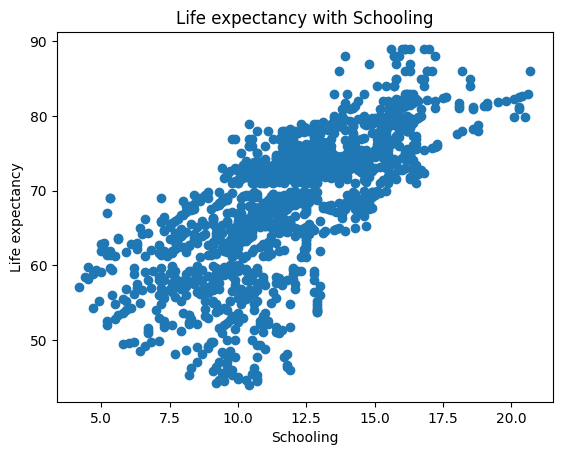

In [25]:
x = df.Schooling # 
y = df.Life_expectancy
plt.scatter(x, y)
plt.ylabel("Life expectancy")
plt.xlabel("Schooling")
plt.title("Life expectancy with Schooling")

## Checkpoint : 1 
Call your teacher to validate the parts 1 and 2

## STEP 3: Simple Linear Regression

In [26]:
import numpy as np

**TO CODE 3.1**

Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [27]:
df_study= df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")][["Life_expectancy","Income_composition_of_resources"]]
display(df_study)

,Life_expectancy,Income_composition_of_resources
225,72.0,0.796
226,71.7,0.796
227,71.9,0.793
228,72.0,0.787
229,73.0,0.780
230,70.0,0.771
231,70.0,0.755
232,69.8,0.739
233,68.9,0.723
234,68.1,0.713


**TO CODE 3.2**

Implement a simple least square function and apply it on the previous selected data.

In [28]:
def droite_moindres_carres(X, Y):
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    num = np.sum((X - x_bar) * (Y - y_bar))  
    den = np.sum((X - x_bar) ** 2)           
    a = num / den
    b = y_bar - a * x_bar
    return a, b
    
    

In [29]:
droite_moindres_carres(df_study.Income_composition_of_resources,df_study.Life_expectancy)

(28.5982261406769, 49.34763518833232)

**TO CODE 3.3**

On the same figure, draw the line corresponding to your regression and the data points corresponding to df_study

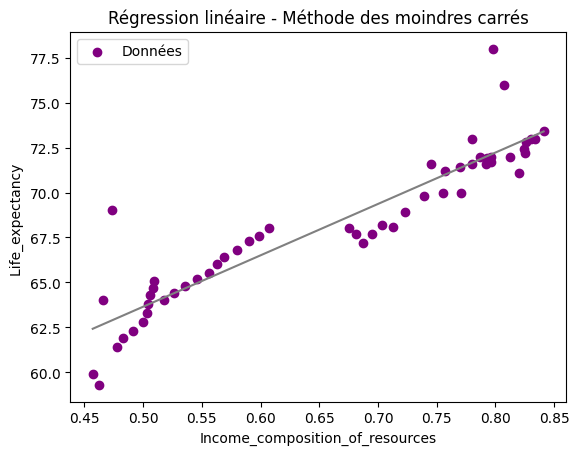

28.5982261406769
49.34763518833232


In [30]:
import matplotlib.pyplot as plt

donnees_X = df_study.Income_composition_of_resources
donnees_y = df_study.Life_expectancy 

def tracer_droite(donnees_X, donnees_y):
    a, b = droite_moindres_carres(donnees_X, donnees_y)
    plt.scatter(donnees_X, donnees_y, color='purple', label='Données')
    x_line = np.linspace(min(donnees_X), max(donnees_X), 100) 
    y_line = a * x_line + b                   
    plt.plot(x_line, y_line, color='grey')
    plt.xlabel('Income_composition_of_resources')
    plt.ylabel('Life_expectancy ')
    plt.title('Régression linéaire - Méthode des moindres carrés')
    plt.legend()
    plt.show()
    print(a)
    print(b)
    return a,b
a,b = tracer_droite(df_study.Income_composition_of_resources,df_study.Life_expectancy)

## Checkpoint : 2
Call your teacher to validate the least square section

**TO CODE 3.4**

Now, implement a Gradient Descend function `def gradDescent(x, y, w, alpha, iters)` where `x` are
the covariates, `y` the target value, `w` the initial weights, `alpha` the learning rate and `iters` the number of gradient descent iterations. Your function should return all intermediary values of `w` that has been computed as a list.

As a gentle reminder, Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. It is an iterative algorithm that aim to find the `w`  that minimizes our objective function. Since we aim to minimize the squared error, we aim to minimize the function : $L(y, \hat{y})=\sum\limits_{i=1}^n (y_i - w_1x_i-w_0)^2 $

Since previous function is convex, the derivative at each point indicate the **opposite** direction of the minimum. Thus, the idea is to update each weight by a small proportion of the opposite of this direction : 
$w_i^{t+1} = w_i^t - \alpha \frac{d(L(y, \hat{y}))}{d(w_i)}$

Be careful : here we have to update two weights, so we have to compute both derivative. Pay also attention on the fact that the derivative is computed according to $w_i$. Once you noticed that, calculating the derivative is pretty straightforward

In [31]:
import numpy as np

def gradDescent(x, y, w, alpha, iters):
    w_history=[]
  

    for i in range(iters):
        prediction = w[0] + w[1] * x
        grad_w0 =  np.sum(2*(prediction - y)) 
        grad_w1 =  np.sum(2*((prediction - y) * x))
        w[0] = w[0] - alpha * grad_w0
        w[1] = w[1] - alpha * grad_w1

        w_history.append(w.copy())
    return w_history

**TO CODE 3.5**

Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [32]:
x = df_study["Income_composition_of_resources"].values
y = df_study["Life_expectancy"].values
theta_initial = [0, 1]
iterations = 1000
alphas = [0.001, 0.003, 0.005]
historique = {}
for alpha in alphas:
    historique[alpha] = gradDescent(x, y,[0, 1] , alpha, iterations) 

 

**TO CODE 3.6**

On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

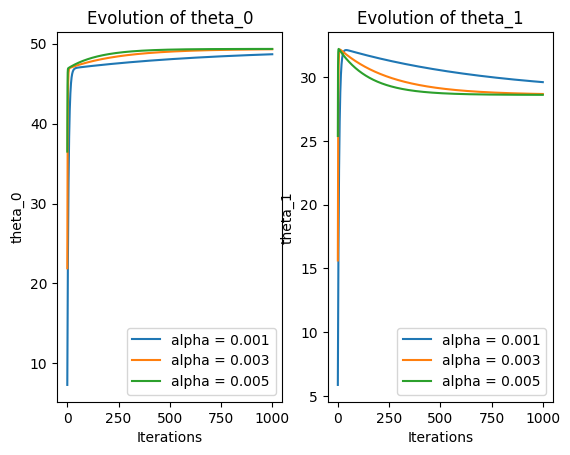

In [33]:
plt.subplot(1, 2, 1)
for alpha, w_history in historique.items():
    plt.plot([w[0] for w in w_history],label=f'alpha = {alpha}')
plt.title('Evolution of theta_0')
plt.xlabel('Iterations')
plt.ylabel('theta_0')
plt.legend()

plt.subplot(1, 2, 2)
for alpha, w_history in historique.items():
    plt.plot([w[1] for w in w_history],label=f'alpha = {alpha}')
plt.title('Evolution of theta_1')
plt.xlabel('Iterations')
plt.ylabel('theta_1')
plt.legend()



**Question 7**

Discuss on the role of alpha

α est un hyperparamètre crucial qui contrôle la vitesse à laquelle le modèle ajuste ses paramètres. Son rôle est de déterminer le pas que l'algorithme effectue à chaque itération pour se rapprocher du minimum de la fonction de coût. On remarque que un α trop petit ralentit la convergence, tandis qu'un α trop grand peut empêcher la convergence.

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [34]:
from sklearn.metrics import r2_score

**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

In [35]:
y_true = np.array(df_study.Life_expectancy)
y_pred = np.array( [a * x + b for x in df_study.Income_composition_of_resources])
r2_score(y_true,y_pred)

0.846632270152281

**QUESTION 8**

Is linear regression suited between the two selected variables?

Puisque la valeur est proche de 1, on peut déduire que la régression lineaire qu'on a fait est bien appropriée mais si on avait plus de valeurs dans data, la valeur va etre plus proche de 1 et la regression va etre plus pertinente.

**QUESTION 9**

If not, what would be the relevant regression between these two variables?

Si la regression linéaire n'est pas appropriée, on peut utiliser utiliser la regression polynomiale ou logarithmique ou exponentielle.

## Checkpoint : 3
Call your teacher to validate the rest of section 3

## STEP 4: Diagnostic visualization

**TO CODE 4.1**

Compute the residuals and plot the residuals vs fitted values.

residuals = [-1.11823196e-01 -4.11823196e-01 -1.26028518e-01  1.45560839e-01
  1.34574842e+00 -1.39686754e+00 -9.39295925e-01 -6.81724306e-01
 -1.12415269e+00 -1.63817043e+00 -1.25218817e+00 -1.52340236e+00
 -1.79461655e+00 -1.12302719e+00 -6.51437833e-01  1.29324154e+00
  1.12202735e+00  1.07941139e+00  8.65393650e-01  7.79974138e-01
  5.51563494e-01  2.51751077e-01  2.37733339e-01  1.23715600e-01
  9.69786167e-03 -1.61516329e-01  1.25662736e-03 -1.98555790e-01
 -8.41628851e-02 -1.69769981e-01 -5.12573528e-01 -7.41171754e-01
 -1.69818062e+00 -5.69394815e-01  3.57359632e+00  5.83098035e+00
 -3.97430292e-01 -5.42515781e-02  3.17306833e-02  2.03507623e-01
  9.46686337e-01  1.19586771e+00  8.24465932e-01  4.81662384e-01
  3.88588368e-02 -4.32542937e-01 -8.46748259e-01 -1.08936422e+00
 -1.26057841e+00 -1.61758728e+00  6.12540385e+00  1.32559143e+00
 -2.51702453e+00 -3.26001567e+00]


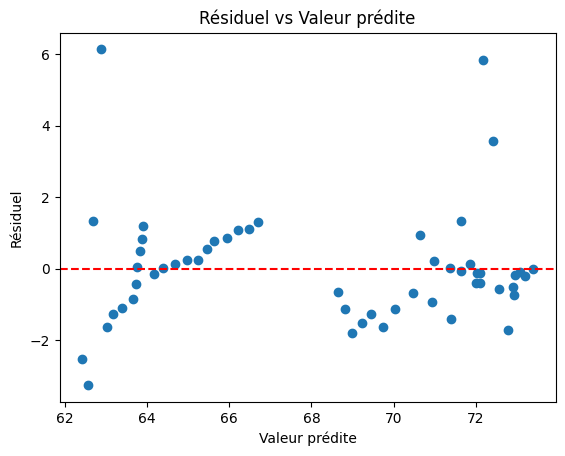

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x = df_study["Income_composition_of_resources"].values
y = df_study["Life_expectancy"].values






y_preed= a * x + b
residuals = y - y_preed
print("residuals = " + str(residuals))
plt.scatter(y_pred, residuals)
plt.xlabel('Valeur prédite')
plt.ylabel('Résiduel')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Résiduel vs Valeur prédite')
plt.show()


**Question 10**

What can you conclude about this plot ?

 les résidus sont répartis de manière non aléatoire autour de 0 (avec des résidus à la fois positifs et négatifs ), cela montre que la relation n'est pas vraiment lineaire et plus complexe. Cela signifie que le modèle ne présente pas de biais systématique et qu'il est équilibré en termes de sous-estimation et surestimation des valeurs.

**TO CODE 4.2**

Also compute the Scale Location plot


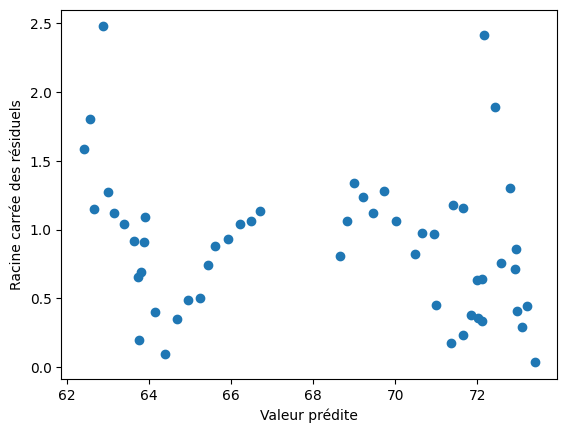

In [37]:
plt.scatter(y_pred, np.sqrt(np.abs(residuals)))
plt.xlabel('Valeur prédite')
plt.ylabel('Racine carrée des résiduels')
plt.show()


**Question 11**

What can you conclude about this plot ?
 
 le modèle montre une variance des résidus relativement constante, ce qui est un bon signe pour sa validité. Cependant, une légère augmentation des résidus pour les valeurs prédites élevées (autour de 72) pourrait indiquer des axes d'amélioration pour mieux capturer la relation entre les variables.

**TO CODE 4.3**

Compute now the Cook's distance for our data. You can compute it by yourself or use any library you can find.


**Question 12**

What can you conclude about this plot ?


**TO DO 4.1** 

We are now adding multiple variable in our regression problem. Run the following cell in order to add multiple variables to your model : 

In [39]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

**TO CODE 4.4**

Dealing with too many variables can sometimes be counter-productive and it can be more interesting to remove some features. One way to evaluate the importance of each variable is to compute the f_test whose function is named f_regression in sklearn. 

**QUESTION 13**

According to the f_test, rank each variable from the least to the most promising. Compare it with the correlation of your subset.

## Checkpoint : 4
Call your teacher to validate the section 4. Congrats, you finished the first TP !